## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


* Kyle Johnson
* Self Paced
* Review: TBD
* Instructor Name: Eli Thomas
* Blog Post URL: TBD

## Objective

The objective of this project is to develope a statistical model that predicts home prices in King County, WA as accurately as possible and answer questions related to the King County housing market.

## Process

In this project, I will be using the data science process known as OSEMN

#### Obtain
This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

#### Scrub
During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.

#### Explore
This step focuses on getting to know the dataset you're working with. This includes things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks of that nature.

#### Model
This step consists of building and tuning models including defining success, selecting target variables, selecting algoriths and techniques, and iterating to achieve the desired results.

#### Interpret
This step involves interpreting the results of the model and communicate results to stakeholders. 

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Load and Explore the Structure of the Data

In [2]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# See how many null values are in the data
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Right away we can see there are a couple problems with the data.  'sqft_basement' is a string and should be a number and there are three variables will null values that need to be addressed.

In [6]:
# Sqft_basement is a string and should be a number. Lets look at the unique values to see whats going on
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
295.0         1
784.0         1
2810.0        1
207.0         1
2120.0        1
2400.0        1
861.0         1
1248.0        1
1990.0        1
1024.0        1
1960.0        1
243.0         1
176.0         1
1913.0        1
276.0         1
248.0         1
4130.0        1
65.0          1
862.0         1
2050.0        1
1281.0        1
2720.0        1
875.0         1
3480.0        1
2190.0        1
1852.0        1
2850.0        1
1880.0        1
3000.0        1
1135.0        1
Name: sqft_basement, Len

There are a low number of values that are '?' and I will replace them with the column mean.  I will also change the variable type to float.

In [7]:
sqft_basement_float=df.sqft_basement[df.sqft_basement !='?']
sqft_basement_float=sqft_basement_float.astype(float)
sqft_basement_mean=sqft_basement_float.mean()
df.sqft_basement=(df['sqft_basement'].map(lambda x: sqft_basement_mean if x == '?' else x)).astype(float)

The variables 'waterfront', 'view' and 'yr_renovated' all have null values.  Because these are all positive features that would be a selling point and thus included, I will assume that they were not on the water, did not have a view and were not renovated.

In [8]:
df.waterfront=df.waterfront.fillna(0)
df.view=df.view.fillna(0)
df.yr_renovated=df.yr_renovated.fillna(0)

## Exploring the Data

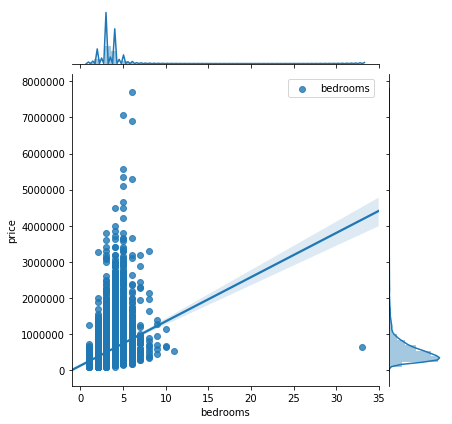

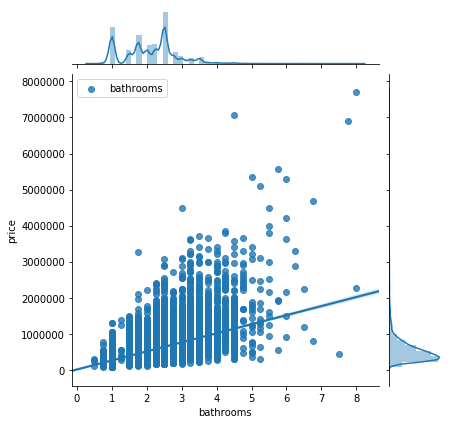

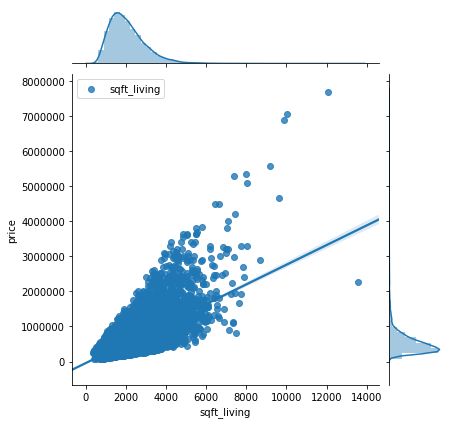

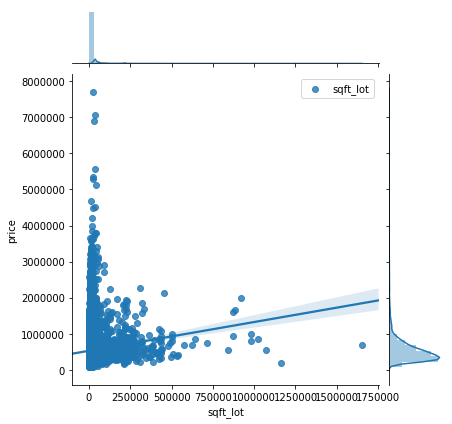

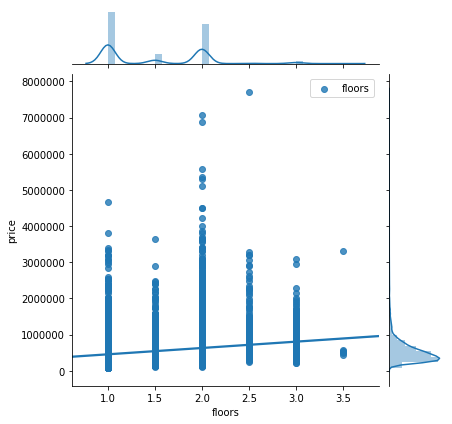

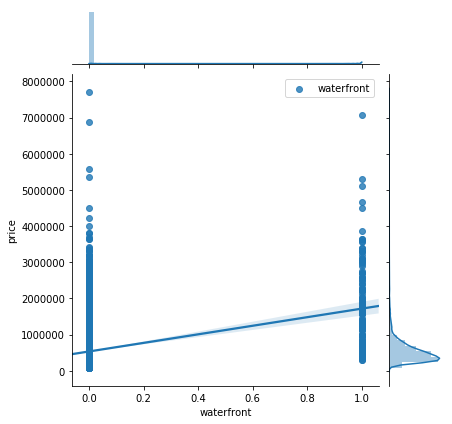

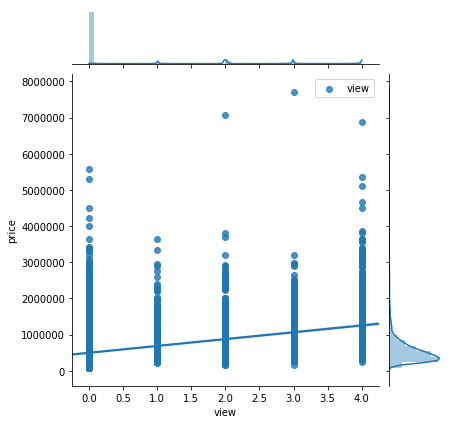

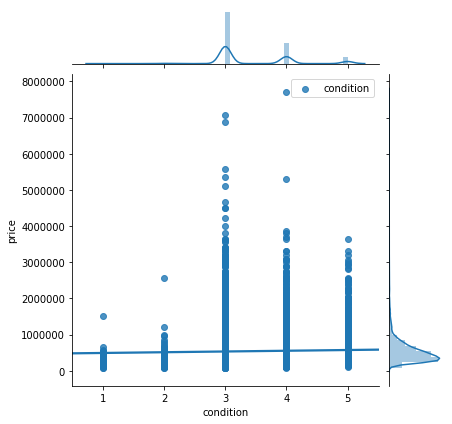

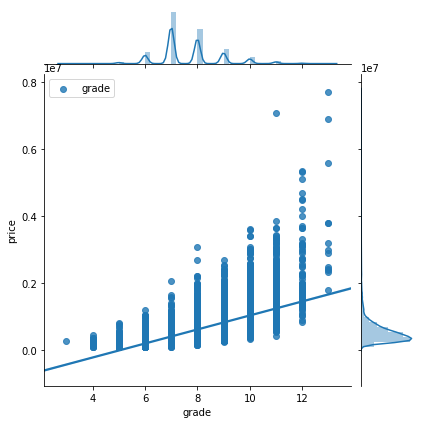

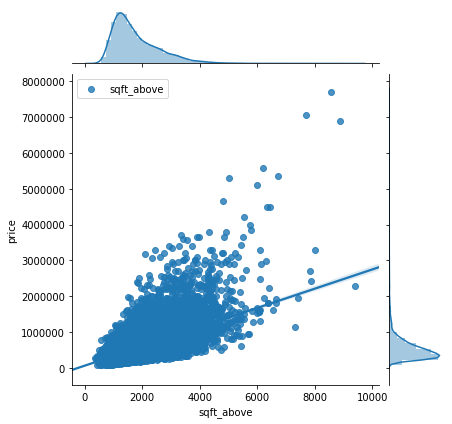

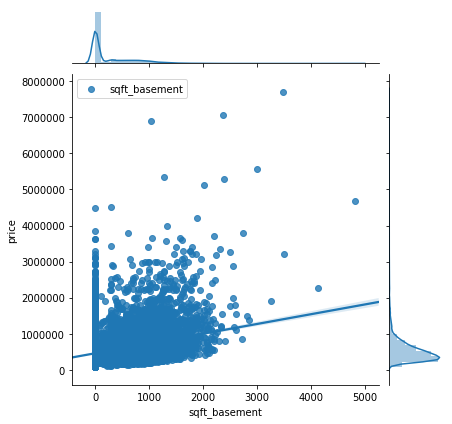

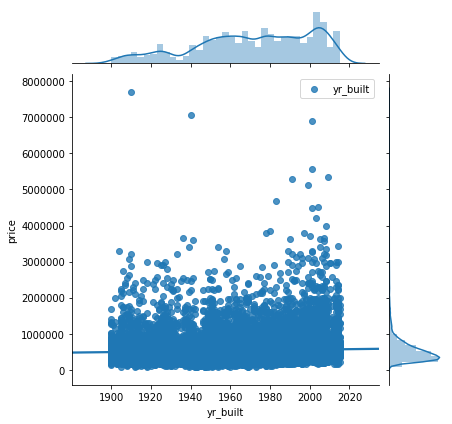

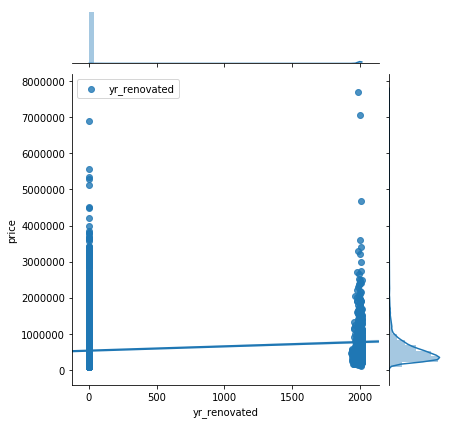

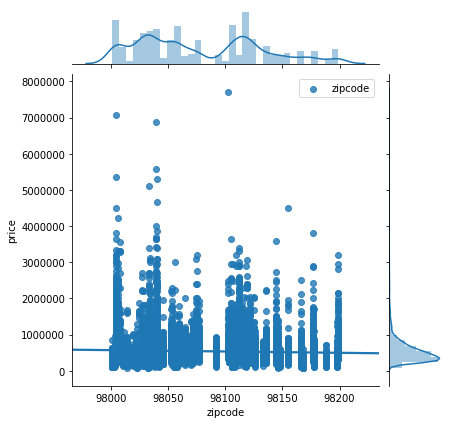

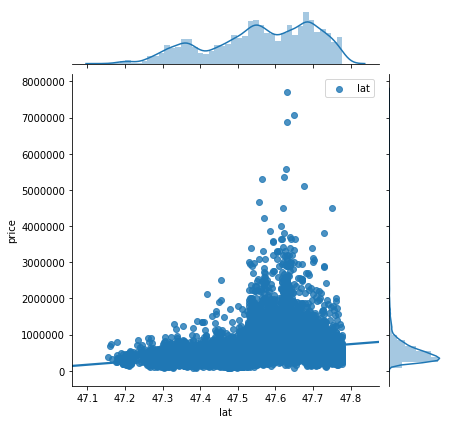

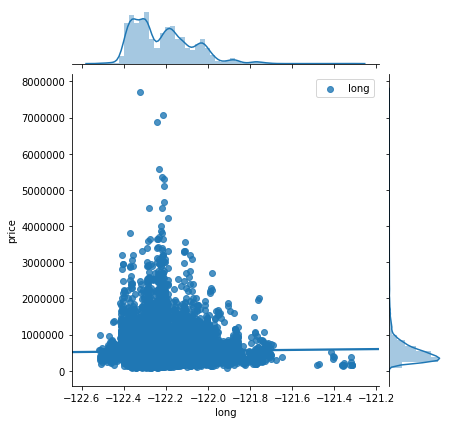

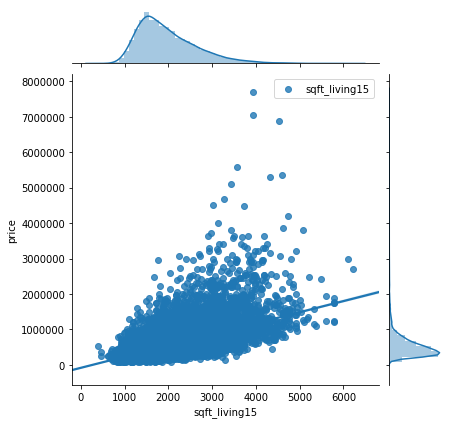

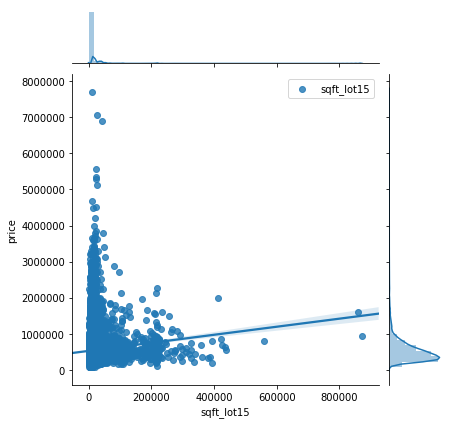

In [9]:
cats=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
for i in cats:
    sns.jointplot(x=i,y='price',data=df,kind='reg', label=i)
    plt.legend()
    plt.show()

There are several things that I notice:
- It looks like we have a couple major outliers that could throw things off.
- 'bedrooms', 'condition', 'floors', 'view', 'grade', 'waterfront' and 'yr_renovated' should become categorical variables.
- 'bathrooms' could be turned into a categorical variable but it is continuous enough to leave i as it is for now. 
- 'longitude' and 'latitude' will likely be useful in graphics but may not in regression.

In [10]:
# I think it is a good idea to throw out some of the extreme outliers
# It seems like using the number of bedrooms is a good idea
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
# I think that it is wise to remove the handful of data points that have more than 8 bedrooms
df=df[df['bedrooms']<9]

## Defining what I hope to accomplish
Before doing any heavy duty modeling, I would like to explore a few questions based on specific relationships
- 1 - How much of a premium is there for a house being bigger than the neighbors?
- 2 - What are the most expensive zipcodes and where are they on the map?
- 3 - How much value does renovation add to a home?

There are also a few questions that I would like to answer using the results of regression modeling:
- 4 - Should a homeowner add a bedroom or bathroom, assuming the same construction costs?
- 5 - How much is waterfront worth? What is that value comparable to?

#### Question 1:
How much of a premium is there for a house being bigger than the neighbors?

To answer this question I will create a column called 'sqft_compare' that will be a percentage of the sold home relative to its average neighbor.  'sqft_compare' greater than 1 constitute a big house and less than 1 constitutes a small house.

Small House Statistics
count    1.175900e+04
mean     4.644023e+05
std      2.602303e+05
min      7.800000e+04
25%      2.950000e+05
50%      4.060000e+05
75%      5.600000e+05
max      3.400000e+06
Name: price, dtype: float64

Big House Statistics
count    9.827000e+03
mean     6.308024e+05
std      4.475569e+05
min      1.025000e+05
25%      3.650000e+05
50%      5.250000e+05
75%      7.485000e+05
max      7.700000e+06
Name: price, dtype: float64


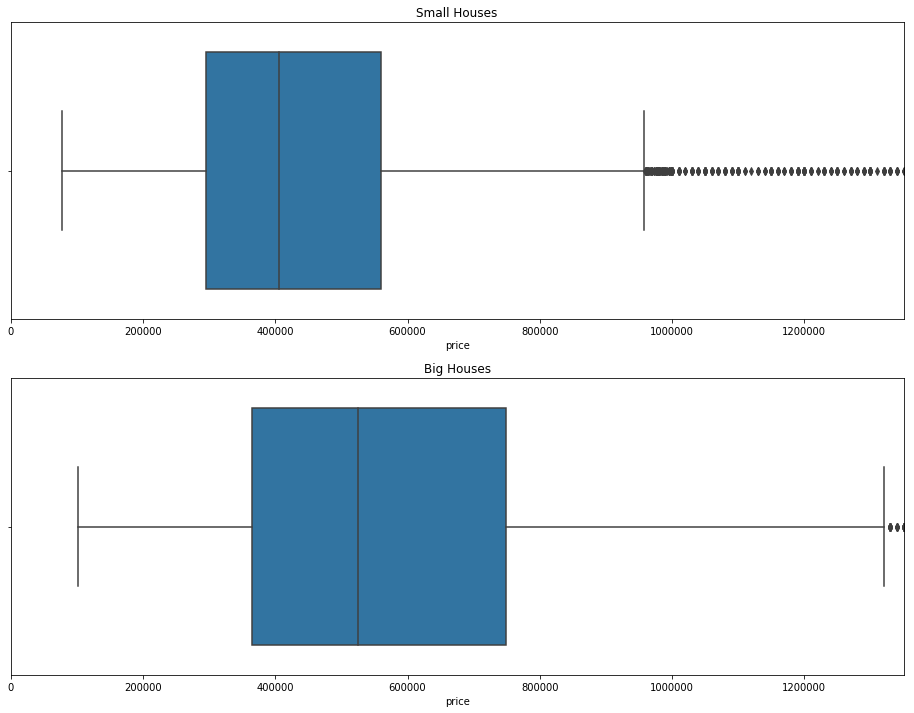

In [12]:
df['sqft_compare']=df['sqft_living']/df['sqft_living15']
# This creates seperate data frames for the big and small houses
df_small_house=df.copy()
df_big_house=df.copy()
df_small_house=df[df['sqft_compare']<=1]
df_big_house=df[df['sqft_compare']>1]
# Here is a visualization of the big houses vs the small houses
plt.figure(figsize=(16,12))
plt.subplot(212)
plt.xlim(0,1350000)
plt.title('Big Houses')
sns.boxplot(df_big_house.price)
plt.subplot(211)
plt.xlim(0,1350000)
plt.title('Small Houses')
sns.boxplot(df_small_house.price)
# Here are the detailed numbers of the comparison
print('Small House Statistics')
print(df_small_house.price.describe())
print('')
print('Big House Statistics')
print(df_big_house.price.describe())

As we can see, there is clearly a premium for being the "biggest house in the neighborhood."  The mean of this mean premium is over $160,000.  We will come back to this question at the end and compare this result to that obtained by regression.

#### Question 2:
What are the most expensive zipcodes and where are they on the map?

To answer this question I will find the mean value of each zipcode and then plot the top 5 zipcodes on a map.

Text(0.5, 1.0, 'Top 5 Zipcodes in King County')

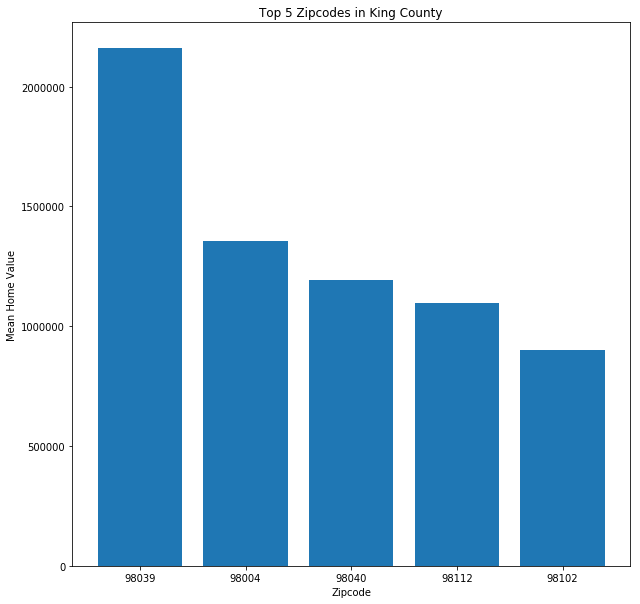

In [13]:
zipcodes=df.zipcode.unique()
zipcode_mean={}
for i in zipcodes:
    df_holder=df[df['zipcode']==i]
    mean=df_holder.price.mean()
    zipcode_mean[i]=mean
counts=list(zipcode_mean.items())
top5=sorted(counts,key=lambda x:x[1],reverse=True)[:5]
y = [item[1] for item in top5]
X = np.arange(len(y))
plt.figure(figsize=(10,10))
plt.bar(X , y)
plt.xticks(X, [item[0] for item in top5]);
plt.ylabel('Mean Home Value')
plt.xlabel('Zipcode')
plt.title('Top 5 Zipcodes in King County')

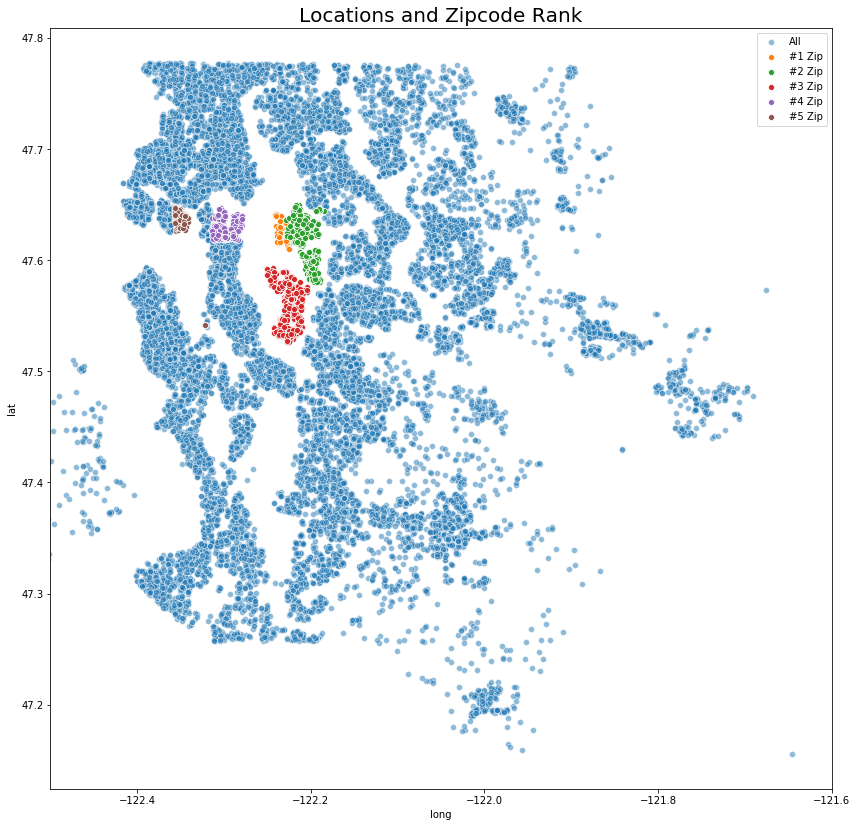

In [14]:
zip1=df[df['zipcode']==98039]
zip2=df[df['zipcode']==98004]
zip3=df[df['zipcode']==98040]
zip4=df[df['zipcode']==98112]
zip5=df[df['zipcode']==98109]
plt.figure(figsize=(14,14))
plt.xlim(-122.5, -121.6)
sns.scatterplot(df.long, df.lat,alpha=.5,label='All')
sns.scatterplot(zip1.long, zip1.lat, alpha=1,label='#1 Zip')
sns.scatterplot(zip2.long, zip2.lat, alpha=1,label='#2 Zip')
sns.scatterplot(zip3.long, zip3.lat, alpha=1,label='#3 Zip')
sns.scatterplot(zip4.long, zip4.lat, alpha=1,label='#4 Zip')
sns.scatterplot(zip5.long, zip5.lat, alpha=1,label='#5 Zip')
plt.title('Locations and Zipcode Rank', fontdict={'fontsize': 20})
plt.legend()
plt.show()

We can see that all five of the most expensive zipcodes are in the same close area and are on or very close to the water.  Examining this area on a traditional map reveals that these areas are all very close to downtown Seattle.

#### Question 3:
How much value does renovation add to a home?

To answer this question I will identify all homes that have been sold more than once and then find the difference in sale price for the second sale.

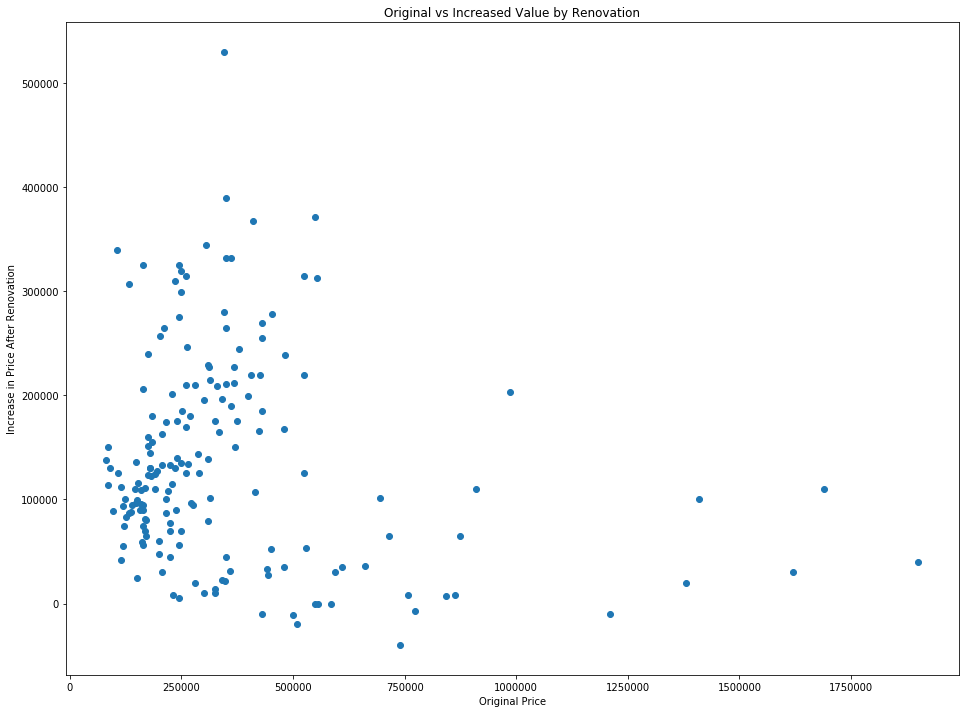

Price increase after renovation: 28 %
Average Price increase:  136568


In [15]:
duplicate = df[ df.id.duplicated(keep=False) ]
prices = duplicate.groupby('id')['price']
plt.figure(figsize=(16,12))
plt.scatter(prices.first(),prices.last()-prices.first())
plt.title('Original vs Increased Value by Renovation')
plt.xlabel('Original Price')
plt.ylabel('Increase in Price After Renovation')
plt.show()
print('Price increase after renovation:',round( ( 1 - ( prices.first().mean() / prices.last().mean() ) ) * 100 ),'%' )
print('Average Price increase: ',round(prices.last().mean() - prices.first().mean()))

As we can see there is a very strong relationship between doing renovations and increasing a home's value.  In this sample, the average of that increase is 28% and $136,568.  It also seems to show that homes at the lower end of the prices scale have the most room for improvement and thus could be focussed on by contractors and real estate speculators.

## Data Exploring and Scrubbing continued
This next section I will clean and prepare the data for regression analysis in order to build predictive models.  Before making any adjustments to the data, lets look at the correlation matrix:

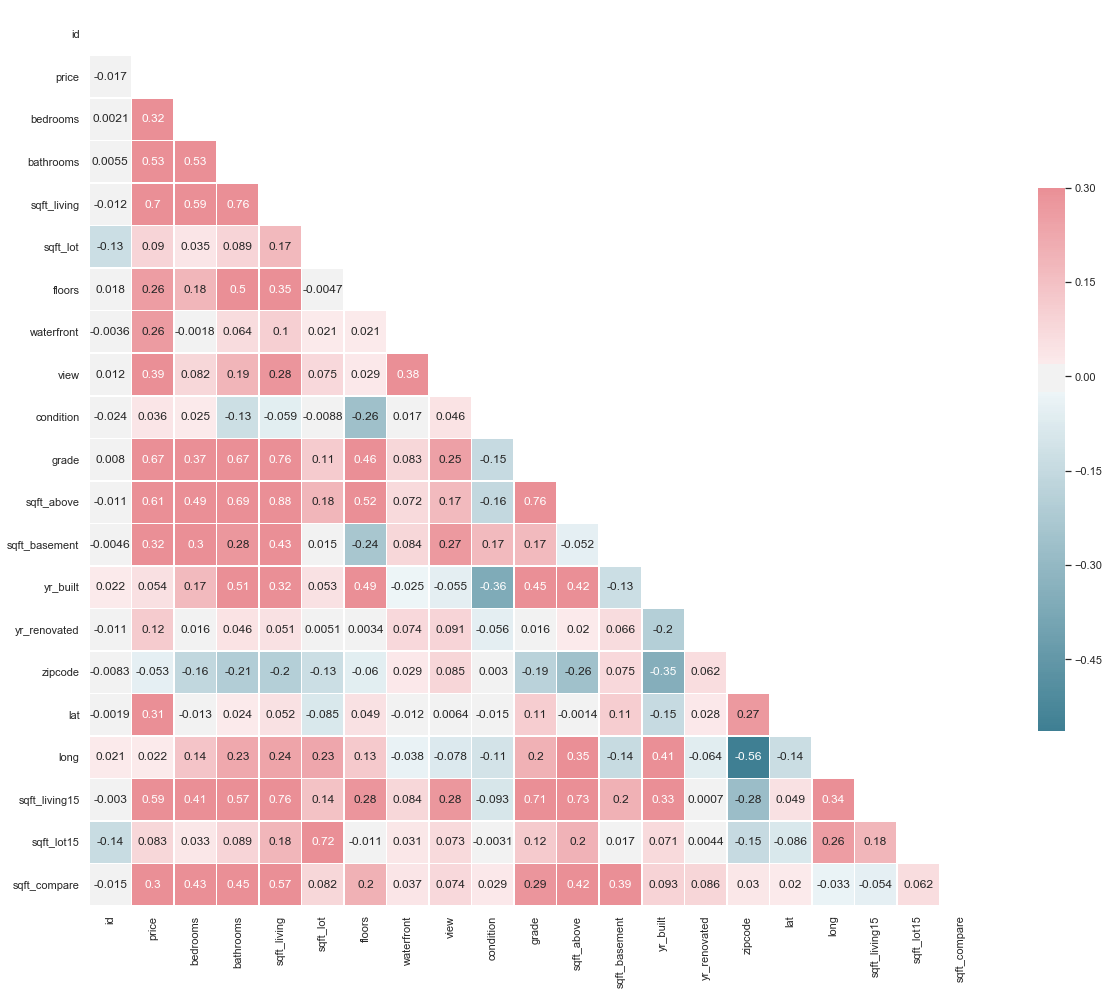

In [16]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Here we are checking for highly correlated inputs:
- 'sqft_living' and 'sqft_above' have a correlation of .88 and thus one should be dropped
- 'sqft_living' and 'grade' are also correlated but do to their descripitive differences, I think it is wise to leave both in.

In [17]:
df.drop(['sqft_above'],axis=1,inplace=True)    

Given what we learned in Question 2 that high value home prices tend to be located in close proximity to each other, I think it will be potentially fruitful to create dummy variables for each zipcode.

In [18]:
zipcodes2=pd.get_dummies(df.zipcode,drop_first=True)
df=df.join([zipcodes2])

There are now a number of that will no longer be necessary and we can drop them.

In [19]:
df.drop(['id','date','lat','long','zipcode'],axis=1,inplace=True)

## Modeling
Before running a regression model, it is important to select useful variables to put into the model.  I will be determining which variables to use with the Stepwise Selection Method.  There is a detailed description of this method at the following URL: https://en.wikipedia.org/wiki/Stepwise_regression

After selecting which variables to use, I will run a regression model using the OLS model.  I will then examine the results and make adjustments to try to improve the model.

In [20]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [21]:
X=df.copy()
X.drop(['price'],axis=1,inplace=True)
y=df['price']
result = stepwise_selection(X, y, verbose = True)

C:\Users\kylej\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living15                  with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  sqft_compare                   with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add                           98004 with p-value 0.0
Add                           98039 with p-value 5.2048e-287
Add                           98112 with p-value 4.95815e-149
Add  view                           with p-value 4.11589e-165
Add                           98040 with p-value 9.36032e-153
Add                           98033 with p-value 6.33557e-109
Add                           98023 with p-value 2.30435e-100
Add                           98105 with p-value 2.75916e-72
Add                           98092 with p-value 4.72027e-64
Add                           98119 with p-value 1.11769e-62
Add                           98103 with p-value 1.44078e-66
Add           

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [22]:
X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1324.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        15:55:26   Log-Likelihood:            -2.8909e+05
No. Observations:               21586   AIC:                         5.783e+05
Df Residuals:                   21514   BIC:                         5.789e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.315e+06   1.22e+05     10.750      0.000    1.08e+06    1.55e+06
sqft_living15  -132.4803      5.884    -22.516      0.000    -144.013    -120.947
waterfront     6.695e+05   1.44e+04     46.397      0.000    6.41e+05    6.98e+05
sqft_compare  -2.709e+05   9780.005    -27.702      0.000    -2.9e+05   -2.52e+05
grade          5.985e+04   1797.475     33.296      0.000    5.63e+04    6.34e+04
yr_built       -791.4141     62.843    -12.593      0.000    -914.592    -668.237
sqft_living     332.7677      5.430     61.288      0.000     322.125     343.410
98004          7.572e+05   9546.601     79.314      0.000    7.38e+05    7.76e+05
98039          1.275e+06   2.29e+04     55.748      0.000    1.23e+06    1.32e+06
98112          6.017e+05   1.06e+04     56.586      0.000    5.81e+05    6.23e+05
view           5.536e+04   1707.576     32.422      0.000     5.2e+04    5.87e+04
98040           4.88e+05   1.01e+04     48.103      0.000    4.68e+05    5.08e+05
98033          3.442e+05   8144.752     42.266      0.000    3.28e+05     3.6e+05
98023         -5.251e+04   7604.655     -6.905      0.000   -6.74e+04   -3.76e+04
98105          4.471e+05   1.13e+04     39.588      0.000    4.25e+05    4.69e+05
98092         -5.718e+04   8910.855     -6.417      0.000   -7.46e+04   -3.97e+04
98119          4.566e+05   1.25e+04     36.657      0.000    4.32e+05    4.81e+05
98103          3.209e+05   7554.165     42.474      0.000    3.06e+05    3.36e+05
98115          3.125e+05   7410.280     42.178      0.000    2.98e+05    3.27e+05
98199          3.658e+05   9606.620     38.079      0.000    3.47e+05    3.85e+05
98117           3.03e+05   7621.548     39.761      0.000    2.88e+05    3.18e+05
98109          4.718e+05   1.58e+04     29.889      0.000    4.41e+05    5.03e+05
98102          4.847e+05   1.63e+04     29.767      0.000    4.53e+05    5.17e+05
98107          3.265e+05   1.04e+04     31.249      0.000    3.06e+05    3.47e+05
98122          3.165e+05   1.02e+04     31.163      0.000    2.97e+05    3.36e+05
98006           2.46e+05   7911.125     31.091      0.000     2.3e+05    2.61e+05
98116          2.753e+05   9438.927     29.163      0.000    2.57e+05    2.94e+05
98144          2.616e+05   9272.914     28.216      0.000    2.43e+05     2.8e+05
98052          2.085e+05   7232.599     28.829      0.000    1.94e+05    2.23e+05
bedrooms      -2.192e+04   1621.806    -13.514      0.000   -2.51e+04   -1.87e+04
98005          2.819e+05   1.27e+04     22.193      0.000    2.57e+05    3.07e+05
98008          2.272e+05   9874.686     23.009      0.000    2.08e+05    2.47e+05
98034          1.815e+05   7321.184     24.796      0.000    1.67e+05    1.96e+05
98003         -3.793e+04   9870.370     -3.843      0.000   -5.73e+04   -1.86e+04
98053          1.738e+05   8527.313     20.380   

This is a pretty good result of the first try at creating a model.  The r-squared is .81 and there are a healthy amount of variables with acceptable p-values.  There are a few coefficients that seem counter intuitive such as sqft_compare and bedrooms being negative.  In the first iteration I will make some minor adjustments to a few variables to try to improve the model.  I will change 'yr_built' into 'age' so that the values aren't so far away from zero.  I will also change the variable 'yr_renovated' into a dummy 'renovated_y_n'.  I will also remove some of the extreme outliers.

In [23]:
# For the second iteration, I will make a second data frame.
df2=df.copy()
df2.yr_built.describe()

count    21586.000000
mean      1971.015751
std         29.364536
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

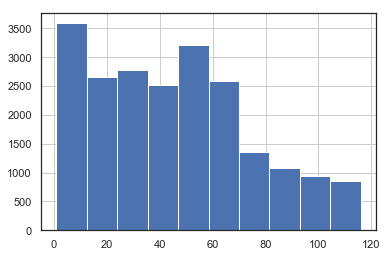

In [24]:
df2['age']=2016-df2.yr_built
df2.age.hist()

This seems like a much more reasonable variable and it has a good distribution of values.

In [25]:
df2['renovated_y_n']=df2['yr_renovated'].map(lambda x: 1 if x>1 else 0)
df2.renovated_y_n=df2.renovated_y_n.astype('category')
df2.drop(['yr_renovated','yr_built'],axis=1,inplace=True)

In [26]:
print('98th Percentile:')
print('Price: ',np.percentile(df2.price,98))
print('Square Feet Living: ',np.percentile(df2.sqft_living,98))
print('Square Feet Lot: ',np.percentile(df2.sqft_lot,98))
print('Bedrooms: ',np.percentile(df2.bedrooms,98))
print('Bathrooms: ',np.percentile(df2.bathrooms,98))

98th Percentile:
Price:  1600000.0
Square Feet Living:  4410.0
Square Feet Lot:  107157.0
Bedrooms:  5.0
Bathrooms:  3.75


In [27]:
print('Before removing outliers: ',len(df2))
df2=df2[df2.price < 1600000]
df2=df2[df2.sqft_living < 4410]
df2=df2[df2.sqft_lot < 107157]
df2=df2[df2.bedrooms < 5]
df2=df2[df2.bathrooms < 4]
print('After removing outliers:',len(df2))

Before removing outliers:  21586
After removing outliers: 18794


#### Iteration 2

In [28]:
X2=df2.copy()
X2.drop(['price'],axis=1,inplace=True)
y2=df2['price']
result2 = stepwise_selection(X2.astype(float), y2, verbose = True)

Add  sqft_living15                  with p-value 0.0
Add  sqft_compare                   with p-value 0.0
Add  grade                          with p-value 0.0
Add  age                            with p-value 0.0
Add                           98004 with p-value 1.97885e-238
Add  view                           with p-value 1.54934e-153
Add                           98023 with p-value 2.37797e-151
Add                           98112 with p-value 1.51381e-112
Add                           98040 with p-value 9.23505e-119
Add                           98033 with p-value 3.20488e-125
Add  floors                         with p-value 1.38183e-91
Add                           98092 with p-value 5.91804e-88
Add                           98042 with p-value 1.80243e-81
Add                           98003 with p-value 1.62548e-81
Add                           98115 with p-value 3.48891e-79
Add                           98199 with p-value 2.4426e-81
Add                           98105 with p-value 3.

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add                           98030 with p-value 1.1658e-67
Add                           98031 with p-value 3.09467e-70
Add                           98198 with p-value 7.71052e-70
Add                           98039 with p-value 5.38782e-67
Add                           98102 with p-value 2.00308e-66
Add                           98107 with p-value 1.91485e-69
Add                           98122 with p-value 4.10478e-73
Drop floors                         with p-value 0.332379
Add                           98116 with p-value 4.50069e-77
Add                           98052 with p-value 1.06218e-63
Add                           98006 with p-value 1.65239e-67
Add                           98005 with p-value 6.41771e-72
Add  waterfront                     with p-value 5.7438e-66
Add                           98053 with p-value 1.41402e-60
Add                           98144 with p-value 1.13675e-52
Add  condition                      with p-value 3.05469e-51
Add                          

In [29]:
X_fin2 = X2[result2].astype(float)
X_int2 = sm.add_constant(X_fin2)
model = sm.OLS(y2,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1199.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        16:00:27   Log-Likelihood:            -2.4250e+05
No. Observations:               18794   AIC:                         4.852e+05
Df Residuals:                   18716   BIC:                         4.858e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.609e+05   9752.759    -47.253      0.000    -4.8e+05   -4.42e+05
sqft_living15    30.8509      2.091     14.752      0.000      26.752      34.950
grade          4.849e+04   1231.631     39.369      0.000    4.61e+04    5.09e+04
age             589.2789     42.553     13.848      0.000     505.870     672.687
98004          5.817e+05   7561.943     76.920      0.000    5.67e+05    5.96e+05
view           4.406e+04   1246.830     35.337      0.000    4.16e+04    4.65e+04
98023         -3.106e+04   5047.582     -6.154      0.000    -4.1e+04   -2.12e+04
98112          4.933e+05   7727.671     63.836      0.000    4.78e+05    5.08e+05
98040          4.452e+05   7882.737     56.482      0.000     4.3e+05    4.61e+05
98033          3.318e+05   5592.749     59.328      0.000    3.21e+05    3.43e+05
98092         -3.139e+04   6102.087     -5.144      0.000   -4.34e+04   -1.94e+04
98003          -1.41e+04   6455.250     -2.184      0.029   -2.68e+04   -1445.685
98115           3.16e+05   5039.867     62.706      0.000    3.06e+05    3.26e+05
98199          3.609e+05   6452.934     55.934      0.000    3.48e+05    3.74e+05
98105          4.123e+05   7942.224     51.915      0.000    3.97e+05    4.28e+05
98103          3.166e+05   5120.217     61.829      0.000    3.07e+05    3.27e+05
98117           3.05e+05   5120.707     59.559      0.000    2.95e+05    3.15e+05
98119          4.206e+05   8364.755     50.278      0.000    4.04e+05    4.37e+05
98109          4.473e+05   1.05e+04     42.416      0.000    4.27e+05    4.68e+05
sqft_living     132.3893      2.317     57.145      0.000     127.848     136.930
98039          7.231e+05   2.62e+04     27.618      0.000    6.72e+05    7.74e+05
98102          4.272e+05   1.08e+04     39.537      0.000    4.06e+05    4.48e+05
98107          3.119e+05   6935.883     44.971      0.000    2.98e+05    3.26e+05
98122          3.149e+05   6821.734     46.157      0.000    3.01e+05    3.28e+05
98116          2.881e+05   6219.738     46.324      0.000    2.76e+05       3e+05
98052          2.383e+05   4972.086     47.923      0.000    2.29e+05    2.48e+05
98006          2.579e+05   5724.465     45.046      0.000    2.47e+05    2.69e+05
98005          3.176e+05   8932.542     35.550      0.000       3e+05    3.35e+05
waterfront     2.592e+05   1.29e+04     20.095      0.000    2.34e+05    2.84e+05
98053          2.212e+05   5891.563     37.539      0.000     2.1e+05    2.33e+05
98144          2.448e+05   6290.452     38.923      0.000    2.33e+05    2.57e+05
condition      2.449e+04   1248.612     19.613      0.000     2.2e+04    2.69e+04
98022         -1.587e+04   7559.027     -2.100      0.036   -3.07e+04   -1057.165
98136           2.42e+05   6726.931     35.978      0.000    2.29e+05    2.55e+05
98008          2.273e+05   6881.325     33.035   

The model improved slightly from having an r-squared of .81 to .83.  The age coefficient is much more intuitve than the yr_built.  There are still some coefficients that are against what common sense would tell us; like bedrooms still being negative.  Therefore we must do another iteration.  For the next iteration, I will log transform and normalize all of the continuous variables, as well as turn some others into dummy variables.  I will use the df2 to continue the refining.

In [30]:
df3=df2.copy()
df3.waterfront=df3.waterfront.astype('category')
view=pd.get_dummies(df3.view, prefix='view',drop_first=True)
condition=pd.get_dummies(df3.condition, prefix='condition',drop_first=True)
grade=pd.get_dummies(df3.grade, prefix='grade',drop_first=True)
bedrooms=pd.get_dummies(df3.bedrooms, prefix='bedrooms',drop_first=True)
floors=pd.get_dummies(df3.floors, prefix='floors',drop_first=True)
# Here I add the new variables to the dataset
df3=df3.join([view,condition,grade,bedrooms,floors])
# Here I drop the unnecessary variables
df3.drop(['view','condition','grade','bedrooms','floors'],axis=1,inplace=True)

In [31]:
# Here is the log transform
log_price=np.log(df3.price)
log_sqft=np.log(df3.sqft_living)
log_lot=np.log(df3.sqft_lot)
log_neighbors=np.log(df3.sqft_living15)
log_neighbors_lot=np.log(df3.sqft_lot15)
log_basement=np.log(df3.sqft_basement)
age2=df3.age
bathrooms=df3.bathrooms
# Here is the normalization
norm_price=(log_price-min(log_price))/(max(log_price)-min(log_price))
norm_sqft=(log_sqft-min(log_sqft))/(max(log_sqft)-min(log_sqft))
norm_lot=(log_lot-min(log_lot))/(max(log_lot)-min(log_lot))
norm_neighbors=(log_neighbors-min(log_neighbors))/(max(log_neighbors)-min(log_neighbors))
norm_neighbors_lot=(log_neighbors_lot-min(log_neighbors_lot))/(max(log_neighbors_lot)-min(log_neighbors_lot))
norm_age=(age2-min(age2))/(max(age2)-min(age2))
norm_bathrooms=(bathrooms-min(bathrooms))/(max(bathrooms)-min(bathrooms))
norm_basement=(log_basement-min(log_basement))/(max(log_basement)-min(log_basement))
df3['norm_price']=norm_price
df3['norm_sqft']=norm_sqft
df3['norm_lot']=norm_lot
df3['norm_neighbors']=norm_neighbors
df3['norm_neighbors_lot']=norm_neighbors_lot
df3['norm_age']=norm_age
df3['norm_bathrooms']=norm_bathrooms
df3['norm_basement']=norm_basement
df3.drop(['price', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_basement', 'sqft_living15', 'sqft_lot15','age'],axis=1,inplace=True)

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [41]:
for i in df3.iloc[:,2:97].columns:
    df3[i]=df3[i].astype('category')

In [46]:
df3.drop(['norm_basement'],axis=1,inplace=True)

#### Iteration 3

In [47]:
X3=df3.copy()
X3.drop(['norm_price'],axis=1,inplace=True)
y3=df3['norm_price']
log_result = stepwise_selection(X3.astype(float), y3, verbose = True)

Add  norm_sqft                      with p-value 0.0
Add  norm_age                       with p-value 9.55713e-210
Add  norm_neighbors                 with p-value 4.67936e-228
Add  norm_neighbors_lot             with p-value 0.0
Add                           98023 with p-value 1.47644e-187
Add                           98004 with p-value 1.57814e-125
Add                           98042 with p-value 3.36276e-122
Add  grade_9                        with p-value 3.02495e-111
Add  grade_10                       with p-value 1.03399e-152
Add  grade_8                        with p-value 1.90166e-224
Add  grade_11                       with p-value 2.64224e-156
Add  grade_7                        with p-value 1.72598e-183
Add                           98092 with p-value 4.19736e-118
Add                           98003 with p-value 1.64285e-121
Add                           98033 with p-value 7.62002e-94
Add                           98168 with p-value 2.56544e-91
Add                         

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add                           98136 with p-value 8.12404e-54
Add                           98052 with p-value 1.21052e-53
Add                           98006 with p-value 2.73435e-52
Add                           98144 with p-value 4.00154e-54
Add                           98005 with p-value 3.46871e-52
Add                           98053 with p-value 1.71078e-55
Add                           98008 with p-value 1.13157e-55
Add                           98039 with p-value 1.08655e-45
Add  condition_5                    with p-value 5.06089e-40
Add                           98029 with p-value 2.84932e-39
Add                           98126 with p-value 1.83059e-38
Add                           98125 with p-value 2.11094e-43
Add                           98034 with p-value 8.5464e-47
Add                           98177 with p-value 1.09854e-44
Add                           98074 with p-value 1.29858e-42
Add                           98075 with p-value 5.21425e-50
Add                      

In [48]:
X_fin3 = X3[log_result].astype(float)
X_int3 = sm.add_constant(X_fin3)
model = sm.OLS(y3,X_int3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             norm_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1296.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        16:16:29   Log-Likelihood:                 26936.
No. Observations:               18794   AIC:                        -5.369e+04
Df Residuals:                   18703   BIC:                        -5.298e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1229      0.014     -8.965      0.000      -0.150      -0.096
norm_sqft              0.1665      0.016     10.403      0.000       0.135       0.198
norm_neighbors         0.2891      0.018     16.093      0.000       0.254       0.324
98023                 -0.0244      0.003     -8.187      0.000      -0.030      -0.019
98004                  0.3439      0.004     76.808      0.000       0.335       0.353
grade_9                0.1211      0.004     27.060      0.000       0.112       0.130
grade_10               0.1453      0.005     29.177      0.000       0.135       0.155
grade_8                0.0818      0.004     19.660      0.000       0.074       0.090
grade_11               0.1862      0.007     27.783      0.000       0.173       0.199
grade_7                0.0527      0.004     13.348      0.000       0.045       0.060
98092                 -0.0128      0.004     -3.536      0.000      -0.020      -0.006
98003                 -0.0096      0.004     -2.513      0.012      -0.017      -0.002
98033                  0.2389      0.003     72.126      0.000       0.232       0.245
98058                  0.0380      0.003     11.993      0.000       0.032       0.044
98002                 -0.0165      0.004     -3.687      0.000      -0.025      -0.008
98032                 -0.0254      0.006     -4.543      0.000      -0.036      -0.014
waterfront             0.1330      0.008     15.662      0.000       0.116       0.150
98040                  0.2731      0.005     58.396      0.000       0.264       0.282
98115                  0.2579      0.003     88.390      0.000       0.252       0.264
98117                  0.2592      0.003     87.310      0.000       0.253       0.265
98103                  0.2671      0.003     88.750      0.000       0.261       0.273
98112                  0.3200      0.004     71.292      0.000       0.311       0.329
98199                  0.2669      0.004     70.635      0.000       0.260       0.274
98119                  0.3073      0.005     62.827      0.000       0.298       0.317
98107                  0.2728      0.004     66.426      0.000       0.265       0.281
98105                  0.2957      0.005     63.656      0.000       0.287       0.305
98116                  0.2410      0.004     66.073      0.000       0.234       0.248
98109                  0.3160      0.006     50.897      0.000       0.304       0.328
98122                  0.2580      0.004     64.936      0.000       0.250       0.266
98102                  0.3065      0.006     48.245      0.000       0.294       0.319
98136                  0.2138      0.004     53.923      0.000       0.206       0.222
98052                  0.1961      0.003     66.684      0.000       0.190       0.202
98006                  0.1935      0.0

#### Interpretation
This third result is another improvement on the previous two results.  The r-squared value has improved to .862, which is a pretty robust model.
Here are some interpretations:
- The the zipcode dummy variables help capture a lot of the real estate notion that "location is key".  They also almost certainly capture many other features that are not in the data set such as school quality, crime rate and proximity to desirable places such as shopping and business centers.
- The variable norm_neighbors also helps capture a lot of the neighborhood value and the impact that has on home prices in a more localized way than the zipcode does.
- Square Footage has a positive relationship with price, as we would expect
- The coefficients for grade increase with the increase in grade, as we would expect:
        - grade_6: .0282
        - grade_7: .0527
        - grade_8: .0818
        - grade_9: .1211
        - grade_10: .1453
        - grade_11: .1862
        - grade_12: .2150
- Bathrooms have a positive but smaller effect on price, as we would expect
- the sqft_compare has a small but positive coefficient, meaning that there is a premium for being a larger house on the block.  This will be further explored below.        

#### Question 4 from above:
Should a homeowner add a bedroom or bathroom, assuming the same construction costs?

The relevant coefficients are:
- 'norm_bathrooms': .0397
- 'bedrooms_2': .0068

This question is a bit tricky to answer from this model because only one of the bedroom dummy variables was seen as significant by the stepwise selection function.  The bathroom coeffiecient is larger than the bedroom dummy variable and therefore if we were forced to make a recommendation to a homeowner, we could conclude that adding a bathroom would be a better choice to increase the value of the home.  However, I think that the best conclusion is that there is not a significant enough relationship to make such a determination and we should leave this as an unanswered question.

#### Question 5 from above:

How much is waterfront worth? What is that value comparable to?

The coefficient of the waterfront dummy is .133 meaning that it has a positive impact on price.  Clearly in this form it is not a useful result and so we must do the inverse of the log and normalization transforms we performed earlier.

In [49]:
print(round(np.e**(.133*(max(log_price)-min(log_price))+min(log_price))))

116475


This result tells us that simply being on the water will increase a home's value by over $116,000.  To find out what that is comparable to we can do the same detransformation on a different variable, in this case we will use 'norm_sqft'.

In [50]:
print(round(np.e**(.133*(max(log_sqft)-min(log_sqft))+min(log_sqft))))

514


This tells us that being on the water has approximately the same impact on a home's price as adding 514 square feet of living space.

#### Revisiting Question 1:
How much of a premium is there for a house being bigger than the neighbors?

Above we determined that being the biggest home on the block commanded a premium of $160,000.  Intuitively this seems high so lets use the regression results to get a better idea.  The coefficient for sqft_compare is .0511.

In [51]:
print(round(np.e**(.0511*(max(log_price)-min(log_price))+min(log_price))))

90991


This result of $90,991 might seem like a large amount but keep in mind that to command this high of a premium, a house would have to be twice as large as the average in the neighborhood.

#### Revisiting Question 3:
How much value does renovation add to a home?

Above we saw that renovation saw an average increase in price of $136,000 or 28% of the home's original value.  Lets compare that to what we find using the model results.  The coefficient for the renovation dummy variable is .0238.

In [52]:
print(round(np.e**(.0238*(max(log_price)-min(log_price))+min(log_price))))

83802


The model shows that the renovations can be expected to add almost $84,000 to a home's price.  This is a result that should be taken with a good understanding of context such as, how much was spent on the renovations and what was done to the house.

## Conclusion
In this project we created a model to predict the price of home sales in King County, WA with 83% explanatory power and answered five questions relating to the housing market.

#### Further Exploration:
There are always ways to improve a model and this one is no different.  The next steps would be to run the model on home sales happening after the last data point to see how it performs in the real world.  We could also obtain different types of data such as proximity to various things such as parks, shopping centers, office centers and transportation routes as well as data on schools and crime.  The final thing we could do to improve the model would be to use more advanced statistical techniques.